Genere N = 200 muestras para definir los siguientes vectores aleatorios.:
1. Para el vector U = [U1, U2] , genere dos variables uniformes,
U1 ~ U(0;2) y U2 ~ U(0;3).


In [4]:
import numpy as np
import matplotlib.pyplot as plt
N = 200
U1 = np.random.uniform(low = 0, high = 2, size = N)
U2 = np.random.uniform(low = 0, high = 3, size = N)

U_vector = np.array([U1, U2])

#NOTA: fila 1 es U1, fila 2 es U2. Columna 1 es la primera realización de U_vector, 
# la segunda columna es la segunda realización de U_vector y así

col_0 = U_vector[: , 0]

print(U_vector[: , 0:3])
print("columan 1", col_0)
#que chiche python viejo. 

[[0.70565383 1.0011995  0.73670524]
 [2.48561499 1.01476274 0.22540759]]
columan 1 [0.70565383 2.48561499]


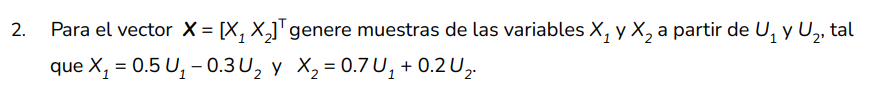

In [ ]:
X1 = 0.5 * U1 - 0.3*U2
X2 = 0.7*U1 + 0.2*U2

X_vector = np.array([X1, X2]) #realizaciones de la variable X(vector)

print(U_vector[: , 0:3])
print(X_vector[: , 0:3])


[[0.70565383 1.0011995  0.73670524]
 [2.48561499 1.01476274 0.22540759]]
[[-0.39285758  0.19617093  0.30073034]
 [ 0.99108068  0.9037922   0.56077519]]


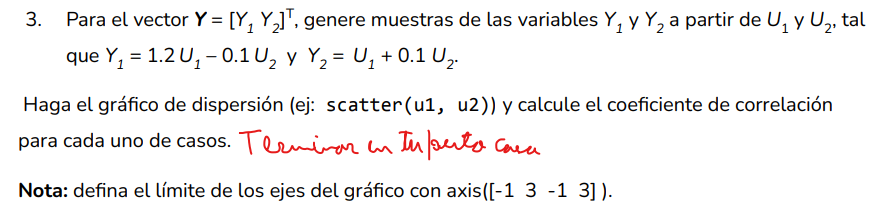

Ya que estamos, pruebo hacerlo con una matriz esta vez

$
B = \begin{pmatrix}
1.2 & -0.1 \\
1 & 0.1
\end{pmatrix}
$

In [30]:
##################################################################3
B = np.matrix([[1.2, -0.1], [1, 0.1]]) #matriz de la transformación lineal
Y = np.dot(B, U_vector)# no es trivial que esto sirva, pero sirve. Ver por qué en las notas.
####################################################################3
#ACÁ ESTÁ EL ERROR. B tendría que ser un ndarray, no una matriz. así a la salida tengo un ndarray
#si B es una matriz, a la salida tengo una matriz, que no me sirve, necesito un ndarray
#Correción:

B = np.array([[1.2, -0.1], 
                [1, 0.1]])
Y = np.dot(B, U_vector)
print(U_vector[:, 0])
print(np.dot(B, U_vector[: , 0]))
print(Y[:, 0])
#óptimo

[0.70565383 2.48561499]
[0.5982231  0.95421533]
[0.5982231  0.95421533]


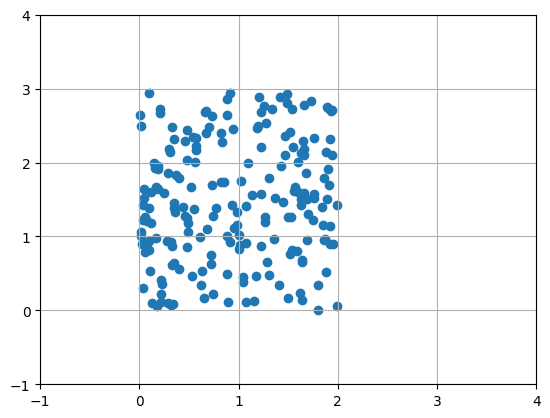

(2, 200)
(200,)
(2, 200)
(200,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Coeficiente de correlación =  [[1.         0.12192092]
 [0.12192092 1.        ]]
A ver ahora [[1.         0.12192092]
 [0.12192092 1.        ]]
Y ahora [[1.         0.12192092]
 [0.12192092 1.        ]]


In [ ]:
plt.scatter(U_vector[0, :], U_vector[1, :])
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.grid(True)
plt.show()
print(U_vector.shape)
print(U_vector[0, :].shape)
print(Y.shape)
print(Y[0, :].shape)
#los resultados son diferentes. ¿XQ???
print(type(U_vector))
print(type(Y))
#son las dos matrices, pero tienen tipos diferentes. Mirá que hdp
#después de la correción en el bloque anterior, sí que tienen el mimso tipo. LPM
rho = np.corrcoef(U_vector[0, :], U_vector[1, :])
print("Coeficiente de correlación = ", rho)
#¿Por qué devuelve una matriz"
#si lees la documentación de corrcoef dice que cada fila del primer parámetro es una variable, y cada columna
#es una realización de esa variable
rho = np.corrcoef(U_vector)
print("A ver ahora", rho)
#tampoco
rho = np.corrcoef(np.transpose(U_vector[0, :]), np.transpose(U_vector[1, :]))
print("Y ahora", rho)

In [ ]:
#Bueno, si leyera un poco más entendería que np.corrcoef devuelve la matriz de correlación, que da los coeficientes de correlación
#entre cada par de variables que le paso, i.e, entre X y X, entre X e Y, entre Y y X y entre Y e Y.
#por supuesto, la matriz es simétrica, y el coeficiente que quiero está en la diagonal secundaria(ponele q se llama así)

r = rho[0][1]
print("Ahora sí, el coeficiente de mierda es", r)

Ahora sí, el coeficiente de mierda 0.12192091980313298


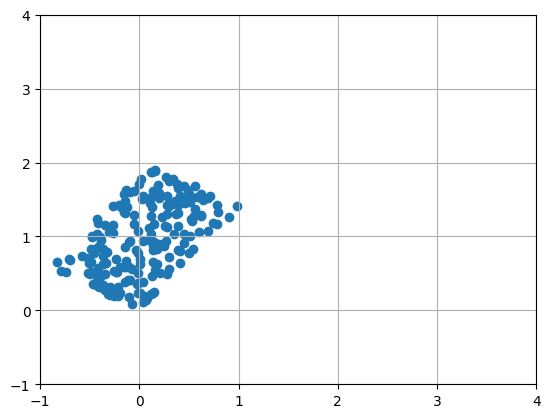

0.5045599680797095


In [41]:
plt.scatter(X_vector[0, :], X_vector[1, :])
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.grid(True)
plt.show()
rho2 = np.corrcoef(X_vector)
r2 = rho2[0][1]
print(r2)

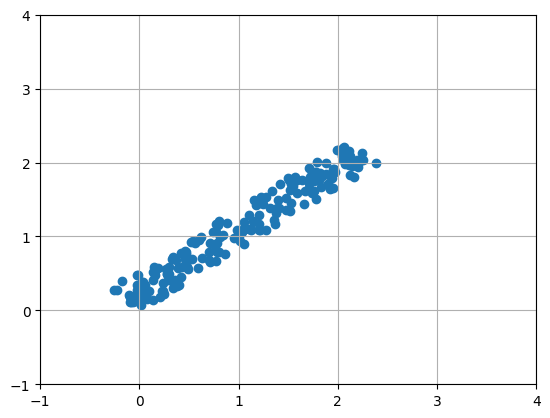

0.9728511399516248


In [ ]:
plt.scatter(Y[0, :], Y[1, :])
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.grid(True)
plt.show()
rho3 = np.corrcoef(Y)
r3 = rho3[0][1]
print(r3)
#Muy lineal de tu parte